In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import geopandas as gpd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colorbar import ColorbarBase 
from matplotlib import colormaps as cm
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

import networkx as nx
import pyballmapper as pbm

from sklearn.preprocessing import MinMaxScaler

In [3]:
# Replace with your actual path if different
file_path = "/Users/alexander/Documents/MSc Data Science/erp-uom/data/dataTurnoutFinal.csv"

# Load the CSV file
df = pd.read_csv(file_path)

In [5]:
# Columns you want to exclude from multiplication
exclude_cols = [
    'religious_fractionalization', 'ethnic_fractionalization',
    'total_spending', 'enp_votes', 'electoral_density'
]

# 1) Full list of target columns from col 7 to 51 (0-based, so col 7 is index 7, col 51 is index 51)
all_cols = df.columns[7:52]  # .columns[7:52] gets columns 7–51 inclusive

# Filter to get columns to multiply: all minus excluded ones
cols_to_multiply = [col for col in all_cols if col not in exclude_cols]

# Multiply these columns by 100
df[cols_to_multiply] = df[cols_to_multiply] * 100.0

In [7]:
# Variables to scale from 0 to 100
vars_to_scale = [
    'religious_fractionalization', 'ethnic_fractionalization',
    'total_spending', 'enp_votes', 'electoral_density'
]

# Function to apply MinMaxScaler and return a DataFrame
def minmax_scale_0_100(group):
    scaler = MinMaxScaler()
    group[vars_to_scale] = scaler.fit_transform(group[vars_to_scale]) * 100.0
    return group

# Apply per election year
df = df.groupby('election_year', group_keys=False, observed=True).apply(
    minmax_scale_0_100
)

/var/folders/9q/x_qkm_295r77cyh7zn22pj3h0000gn/T/ipykernel_2109/1632275772.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('election_year', group_keys=False, observed=True).apply(


## Per component

### 1. Full Toplogy

/opt/anaconda3/lib/python3.12/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  node_collection = ax.scatter(
/opt/anaconda3/lib/python3.12/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  node_collection = ax.scatter(
/opt/anaconda3/lib/python3.12/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(
/opt/anaconda3/lib/python3.12/si

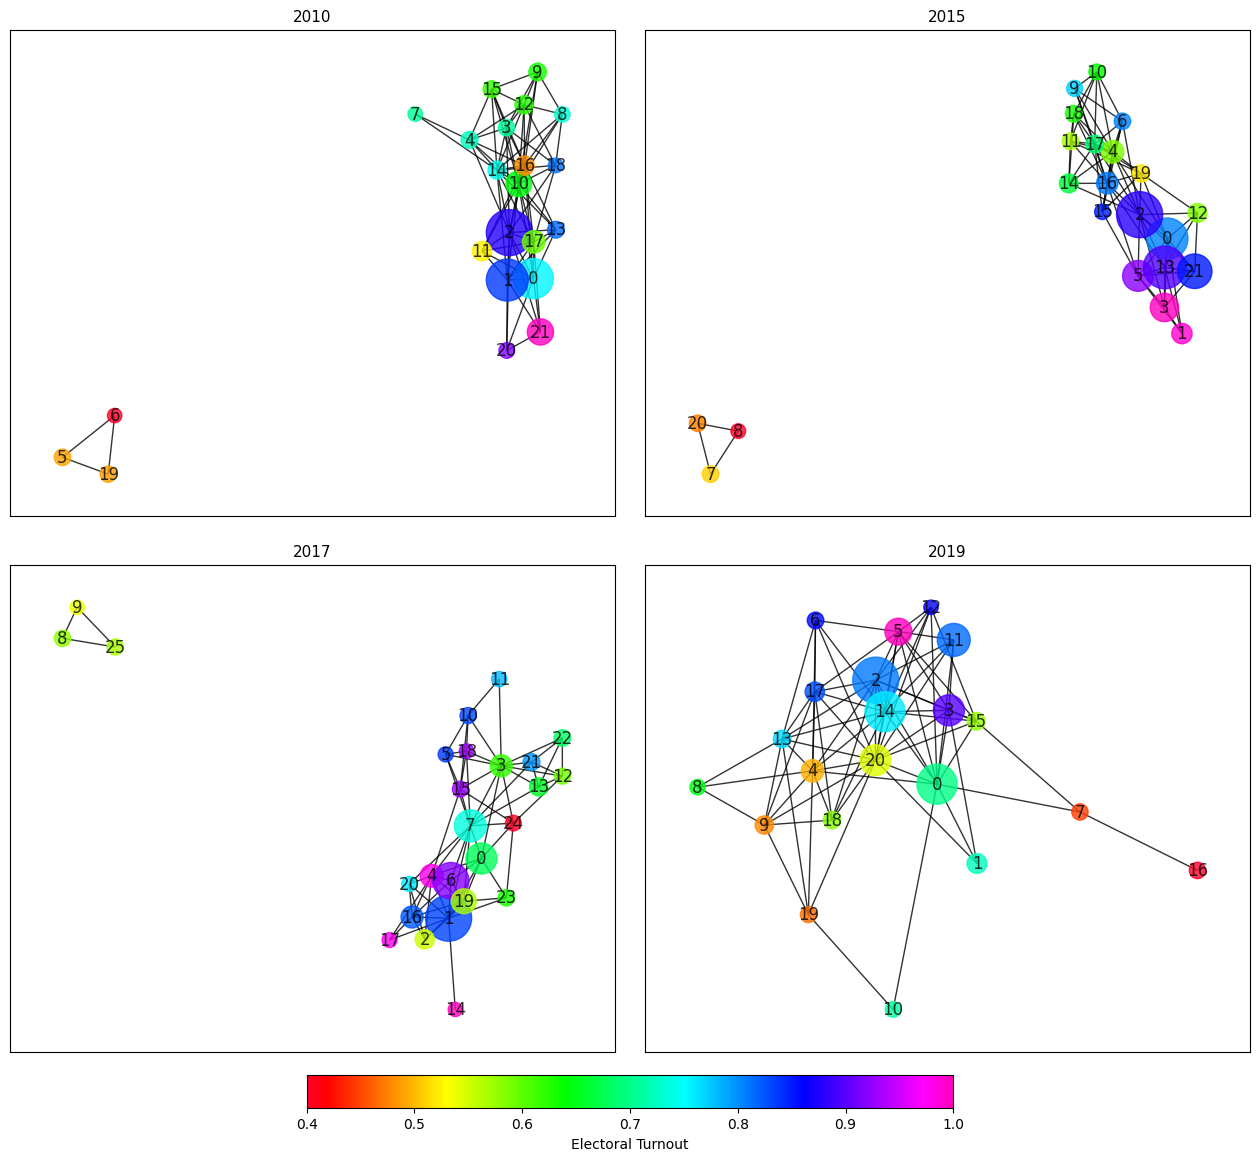

In [11]:
# 1. Define continuous colour map using gist_rainbow
hsvp = cm.get_cmap("gist_rainbow")
vmin, vmax = 0.40, 1.00
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

# 2. Set up figure
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
axes = axes.ravel()

# 3. Loop through election years
for i, (year, group) in enumerate(df.groupby('election_year')):
    group = group.reset_index(drop=True)
    X = group.iloc[:, 7:]
    color_df = group[['electoralTurnout']]

    # Create BallMapper object
    bm = pbm.BallMapper(X=X, eps=70, coloring_df=color_df)

    # Manually assign node colours using gist_rainbow
    for node in bm.Graph.nodes:
        val = bm.Graph.nodes[node]['electoralTurnout']
        if val is not None and not np.isnan(val):
            bm.Graph.nodes[node]['color'] = hsvp(norm(val))
        else:
            bm.Graph.nodes[node]['color'] = "black"

    # Plot without internal colorbar
    plt.sca(axes[i])
    bm.draw_networkx(
        coloring_variable='electoralTurnout',
        color_palette=hsvp,
        colorbar=False,
        vmin=vmin,
        vmax=vmax,
        MIN_SCALE=100,  # Minimum node size
        MAX_SCALE=1000  # Maximum node size
    )
    axes[i].set_title(f"{year}", fontsize=11)

# 4. Add shared colorbar at the bottom
cbar = fig.colorbar(
    plt.cm.ScalarMappable(norm=norm, cmap=hsvp),
    ax=axes,
    orientation='horizontal',
    fraction=0.03,
    pad=0.07
)
cbar.set_label("Electoral Turnout")

# 5. Final layout
plt.subplots_adjust(bottom=0.15, hspace=0.1, wspace=0.05)
plt.savefig("/Users/alexander/Documents/GitHub/turnout-uk/figs/tda/full_topologies70_continuous.jpg", format="jpeg", dpi=600)
plt.show()


### 2. Party vote shares

/opt/anaconda3/lib/python3.12/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  node_collection = ax.scatter(
/opt/anaconda3/lib/python3.12/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  node_collection = ax.scatter(
/opt/anaconda3/lib/python3.12/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(
/opt/anaconda3/lib/python3.12/si

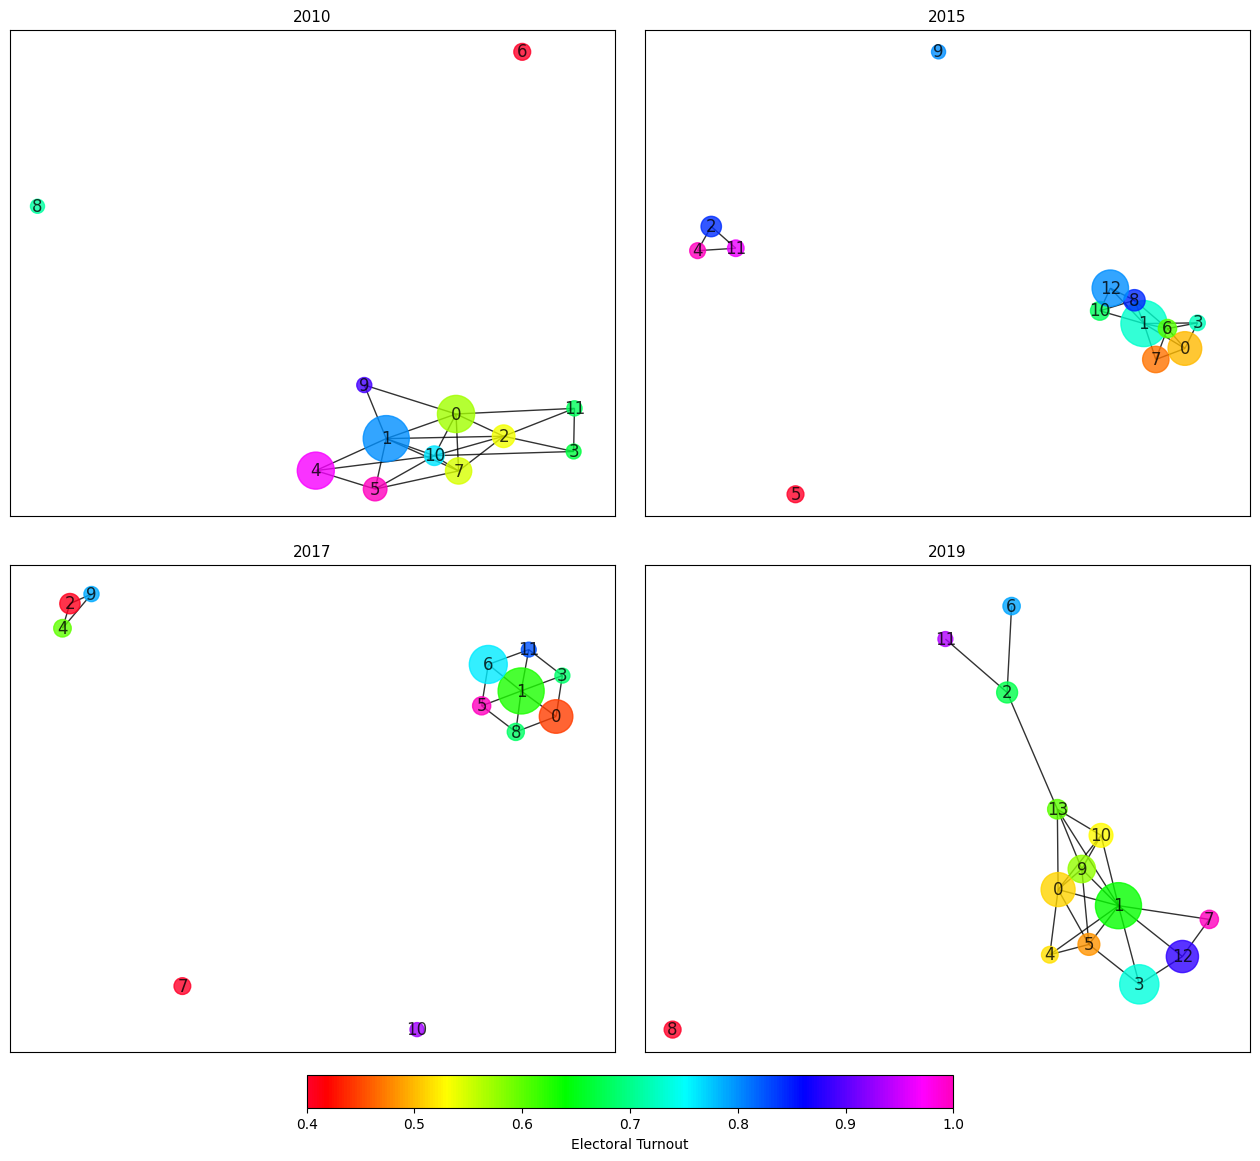

In [89]:
# 1. Define continuous colour map using gist_rainbow
hsvp = cm.get_cmap("gist_rainbow")
vmin, vmax = 0.40, 1.00
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

# 2. Feature subset: party vote shares
vote_vars = ['Con', 'LD', 'Lab', 'Other', 'UKIP', 'SNP']

# 3. Set up figure
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
axes = axes.ravel()

# 4. Loop through election years
for i, (year, group) in enumerate(df.groupby('election_year')):
    group = group.reset_index(drop=True)
    X = group[vote_vars]
    color_df = group[['electoralTurnout']]
    eps_val = 30  # fixed EPS for all

    # Create BallMapper object
    bm = pbm.BallMapper(X=X, eps=eps_val, coloring_df=color_df)

    # Assign node colours using gist_rainbow
    for node in bm.Graph.nodes:
        val = bm.Graph.nodes[node]['electoralTurnout']
        if val is not None and not np.isnan(val):
            bm.Graph.nodes[node]['color'] = hsvp(norm(val))
        else:
            bm.Graph.nodes[node]['color'] = "black"

    # Plot without internal colorbar
    plt.sca(axes[i])
    bm.draw_networkx(
        coloring_variable='electoralTurnout',
        color_palette=hsvp,
        colorbar=False,
        vmin=vmin,
        vmax=vmax,
        MIN_SCALE=100,
        MAX_SCALE=1000
    )
    axes[i].set_title(f"{year}", fontsize=11)

# 5. Shared external horizontal colourbar (slim)
cbar = fig.colorbar(
    plt.cm.ScalarMappable(norm=norm, cmap=hsvp),
    ax=axes,
    orientation='horizontal',
    fraction=0.03,
    pad=0.07
)
cbar.set_label("Electoral Turnout")

# 6. Final layout
plt.subplots_adjust(bottom=0.15, hspace=0.1, wspace=0.05)
plt.savefig("/Users/alexander/Documents/GitHub/turnout-uk/figs/tda/party_shares_eps30_continuous.jpg", format="jpeg", dpi=600)
plt.show()


### 3. Structure

/opt/anaconda3/lib/python3.12/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  node_collection = ax.scatter(
/opt/anaconda3/lib/python3.12/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  node_collection = ax.scatter(
/opt/anaconda3/lib/python3.12/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(
/opt/anaconda3/lib/python3.12/si

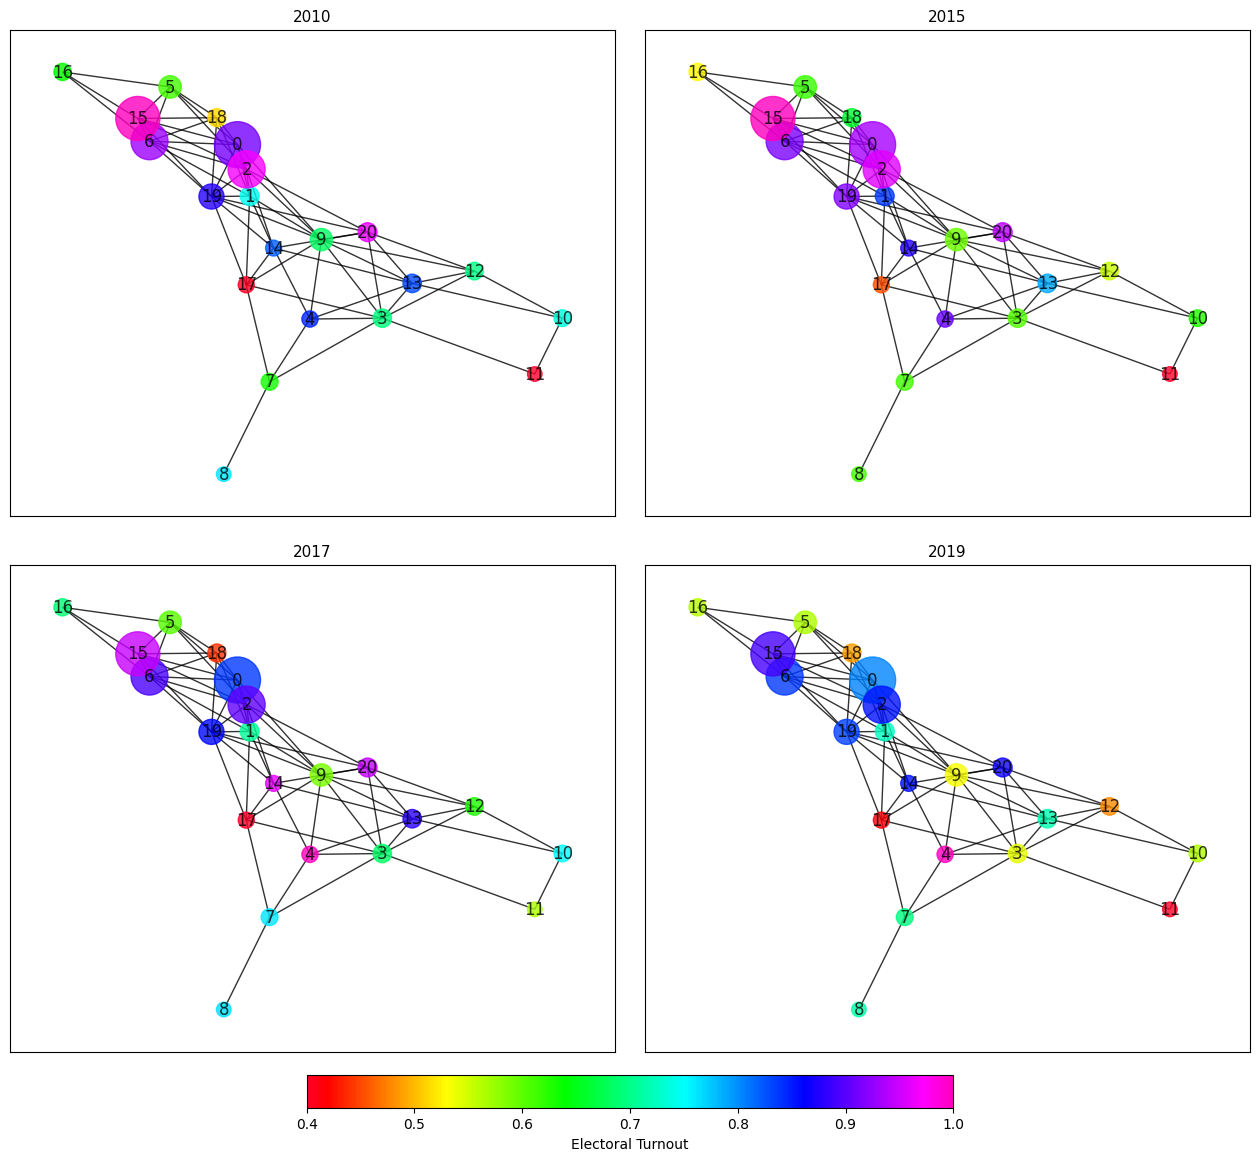

In [83]:
# 1. Define continuous colour map using gist_rainbow
hsvp = cm.get_cmap("gist_rainbow")
vmin, vmax = 0.40, 1.00
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

# 2. Combined variable list
combined_vars = [
    # Ethnicity & religion
    'c11EthnicityWhite', 'c11EthnicityMixed', 'c11EthnicityAsian',
    'c11EthnicityBlack', 'c11EthnicityOther', 'c11Christian',
    'c11ReligionOther', 'c11NoReligion', 'c11ReligionNotStated',
    'ethnic_fractionalization', 'religious_fractionalization',

    # Car ownership, employment, housing, education
    'c11CarsNone', 'c11CarsOne', 'c11CarsTwo', 'c11CarsThree', 'c11CarsFour',
    'c11Unemployed', 'c11EmployedFullTime', 'c11Retired', 'c11FulltimeStudent',
    'c11HouseOwned', 'c11HouseSocial', 'c11HousePrivate',
    'c11QualNone', 'c11QualLevel1', 'c11QualLevel2', 'c11QualLevel3', 'c11QualLevel4'
]

# 3. Set up figure
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
axes = axes.ravel()

# 4. Loop through each election year
for i, (year, group) in enumerate(df.groupby('election_year')):
    group = group.reset_index(drop=True)
    X = group[combined_vars]
    color_df = group[['electoralTurnout']]
    eps_val = 40

    # Create BallMapper object
    bm = pbm.BallMapper(X=X, eps=eps_val, coloring_df=color_df)

    # Assign node colours using gist_rainbow
    for node in bm.Graph.nodes:
        val = bm.Graph.nodes[node]['electoralTurnout']
        if val is not None and not np.isnan(val):
            bm.Graph.nodes[node]['color'] = hsvp(norm(val))
        else:
            bm.Graph.nodes[node]['color'] = "black"

    # Plot without internal colorbar
    plt.sca(axes[i])
    bm.draw_networkx(
        coloring_variable='electoralTurnout',
        color_palette=hsvp,
        colorbar=False,
        vmin=vmin,
        vmax=vmax,
        MIN_SCALE=100,
        MAX_SCALE=1000
    )
    axes[i].set_title(f"{year}", fontsize=11)

# 5. Shared horizontal colourbar (slim)
cbar = fig.colorbar(
    plt.cm.ScalarMappable(norm=norm, cmap=hsvp),
    ax=axes,
    orientation='horizontal',
    fraction=0.03,
    pad=0.07
)
cbar.set_label("Electoral Turnout")

# 6. Final layout and save
plt.subplots_adjust(bottom=0.15, hspace=0.1, wspace=0.05)
plt.savefig("/Users/alexander/Documents/GitHub/turnout-uk/figs/tda/ethn_relig_socio_eps40_continuous.jpg", format="jpeg", dpi=600)
plt.show()


### 4. Politics 

/opt/anaconda3/lib/python3.12/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  node_collection = ax.scatter(
/opt/anaconda3/lib/python3.12/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  node_collection = ax.scatter(
/opt/anaconda3/lib/python3.12/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(
/opt/anaconda3/lib/python3.12/si

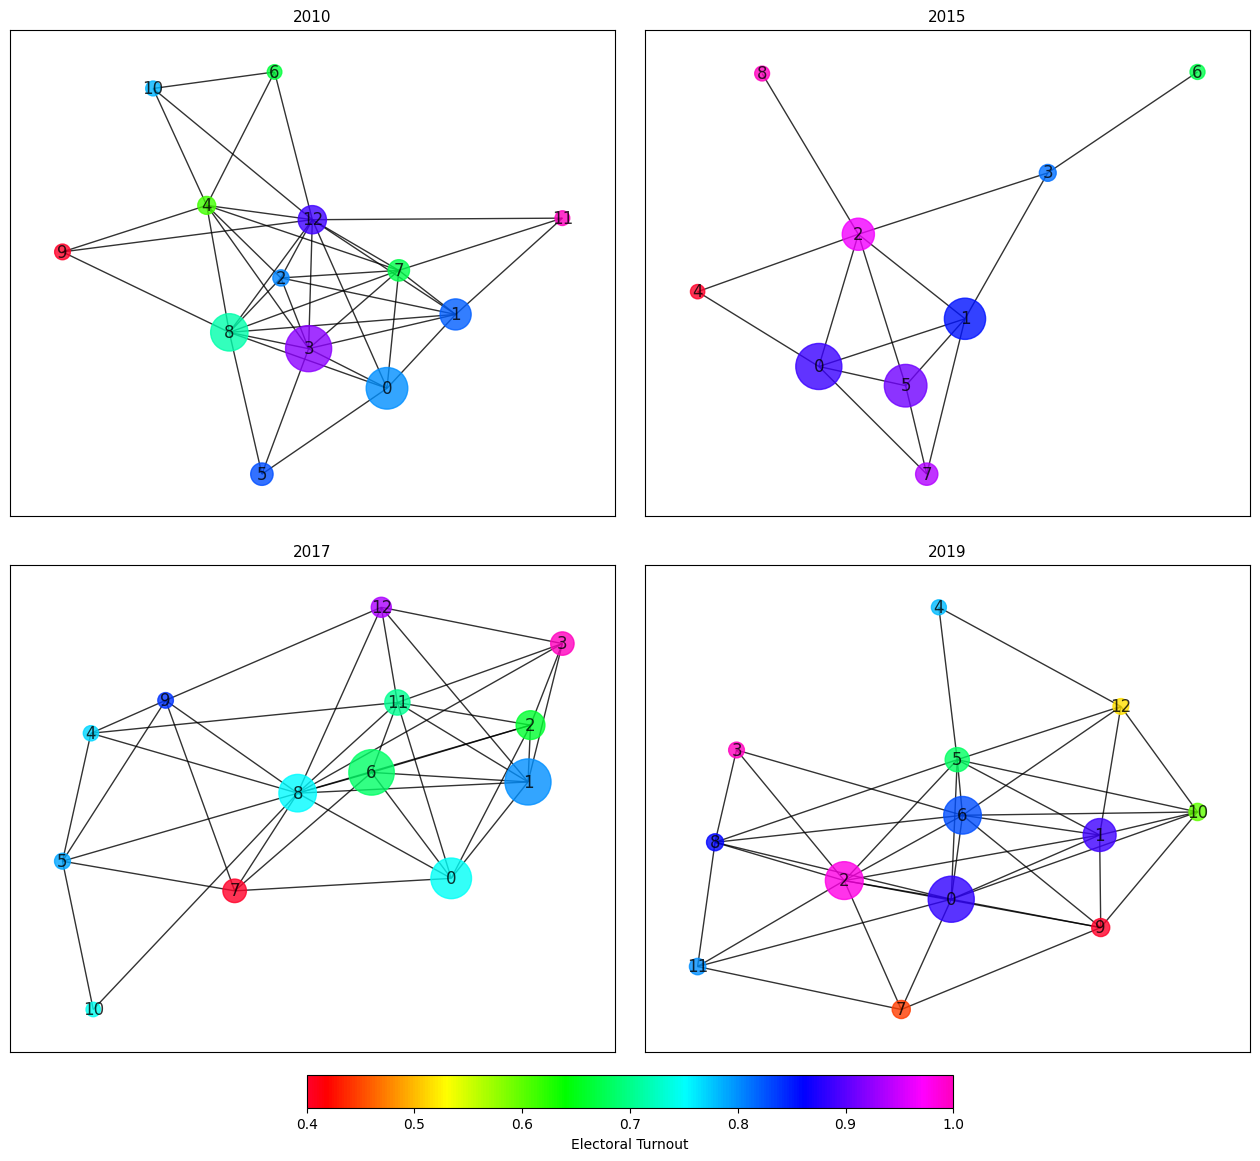

In [91]:
# 1. Define continuous colour map using gist_rainbow
hsvp = cm.get_cmap("gist_rainbow")
vmin, vmax = 0.40, 1.00
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

# 2. Variable list: Spending, ENP, Margin, Density
vars_combined = ['total_spending', 'enp_votes', 'vote_share_margin', 'electoral_density']

# 3. Set up figure
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
axes = axes.ravel()

# 4. Loop through each election year
for i, (year, group) in enumerate(df.groupby('election_year')):
    group = group.reset_index(drop=True)
    X = group[vars_combined]
    color_df = group[['electoralTurnout']]
    eps_val = 40

    # Create BallMapper object
    bm = pbm.BallMapper(X=X, eps=eps_val, coloring_df=color_df)

    # Assign node colours using gist_rainbow
    for node in bm.Graph.nodes:
        val = bm.Graph.nodes[node]['electoralTurnout']
        if val is not None and not np.isnan(val):
            bm.Graph.nodes[node]['color'] = hsvp(norm(val))
        else:
            bm.Graph.nodes[node]['color'] = "black"

    # Plot without internal colorbar
    plt.sca(axes[i])
    bm.draw_networkx(
        coloring_variable='electoralTurnout',
        color_palette=hsvp,
        colorbar=False,
        vmin=vmin,
        vmax=vmax,
        MIN_SCALE=100,
        MAX_SCALE=1000
    )
    axes[i].set_title(f"{year}", fontsize=11)

# 5. Shared horizontal colourbar (slim)
cbar = fig.colorbar(
    plt.cm.ScalarMappable(norm=norm, cmap=hsvp),
    ax=axes,
    orientation='horizontal',
    fraction=0.03,
    pad=0.07
)
cbar.set_label("Electoral Turnout")

# 6. Final layout and save
plt.subplots_adjust(bottom=0.15, hspace=0.1, wspace=0.05)
plt.savefig("/Users/alexander/Documents/GitHub/turnout-uk/figs/tda/spending_enp_margin_density_eps40_continuous.jpg", format="jpeg", dpi=600)
plt.show()
